In [1]:
#季节性ARIMA展示文件，使用cpc的数据进行实例
#转换为其他数据则修改i值、根据aic修改模型参数、输出文件名称即可


import pandas as pd
import matplotlib.pyplot as plt
import csv
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime 
import scipy as stats 
import statsmodels.api as sm 
from scipy import stats 
from statsmodels.tsa.arima_model import ARIMA 


In [2]:
dataFilePaths = ['../input/timeseries/ec2_cpu_utilization_24ae8d.csv','../input/timeseries/exchange-4_cpc_results.csv',
                 '../input/timeseries/occupancy_t4013.csv','../input/timeseries/TravelTime_387.csv','../input/timeseries/Twitter_volume_AMZN.csv']

In [3]:
i = 1
dataFilePath = dataFilePaths[i]

In [4]:
data = pd.read_csv(dataFilePath, parse_dates=['timestamp'], index_col='timestamp')


# df = pd.read_csv(filepath_or_buffer = dataFilePath, header = 0)
print('shape:', data.shape[0])
print('head:')
print(data.head(5))

shape: 1643
head:
                        value
timestamp                    
2011-07-01 00:15:01  0.091795
2011-07-01 01:15:01  0.074414
2011-07-01 02:15:01  0.056984
2011-07-01 03:15:01  0.071225
2011-07-01 04:15:01  0.045466


Text(0.5, 1.0, 'Time Series of value by date time')

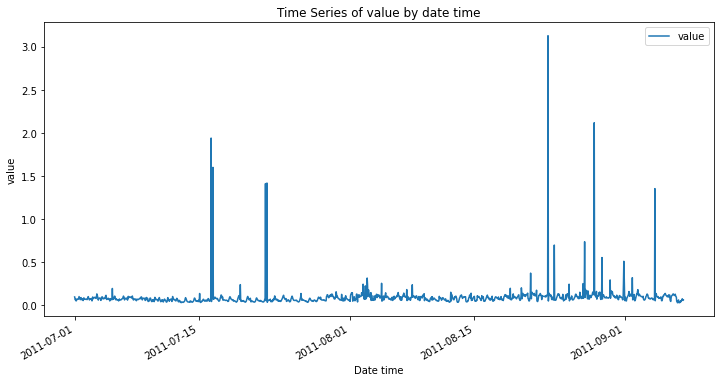

In [5]:
# data['Datetime'] = pd.to_datetime(data['timestamp'])#利用时间戳生成df列

data.plot(figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('value')
plt.title('Time Series of value by date time')

In [6]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2 
p = d = q = range(0, 2)   
# Generate all different combinations of p, q and q triplets 
pdq = list(itertools.product(p, d, q)) 
print(pdq)   
# Generate all different combinations of seasonal p, q and q triplets 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
print(seasonal_pdq)



[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [7]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:     
    for param_seasonal in seasonal_pdq:         
        try:             
            model = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)             
            results = model.fit()             
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))         
        except:             
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:-1455.118002123923
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:-1547.2690531281069
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:-934.1686717280904
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:-1984.1298495748515
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:-1611.2259247236302
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:-2004.9802995862983
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:-1411.5978702820237
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:-1975.4305384780505
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:-1582.3241797438707
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:-1623.6456913295463
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:-931.7415904604477
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:-1981.1368808638372
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:-1659.3191298816655
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:-2001.755287171092
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:-1409.791322349534
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:-1973.0701548250709
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:-992.3105708621838
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:-971.1591986335164
ARIMA(0, 1, 0)x(0

找值最小的AIC
ARIMA(0, 1, 1)x(0, 0, 0, 12) =-2075.249063625087
通过“网格搜索”我们找到了最佳拟合模型的参数，接下里我们将最佳参数值输入到一个新的 SARIMAX 模型：


In [8]:
model = sm.tsa.statespace.SARIMAX(data, order=(0, 1, 1), seasonal_order=(0, 0, 0, 12), enforce_stationarity=False, enforce_invertibility=False) 
results = model.fit() 
print(results.summary().tables[1])



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0146      0.005   -214.976      0.000      -1.024      -1.005
sigma2         0.0160      0.000     88.064      0.000       0.016       0.016


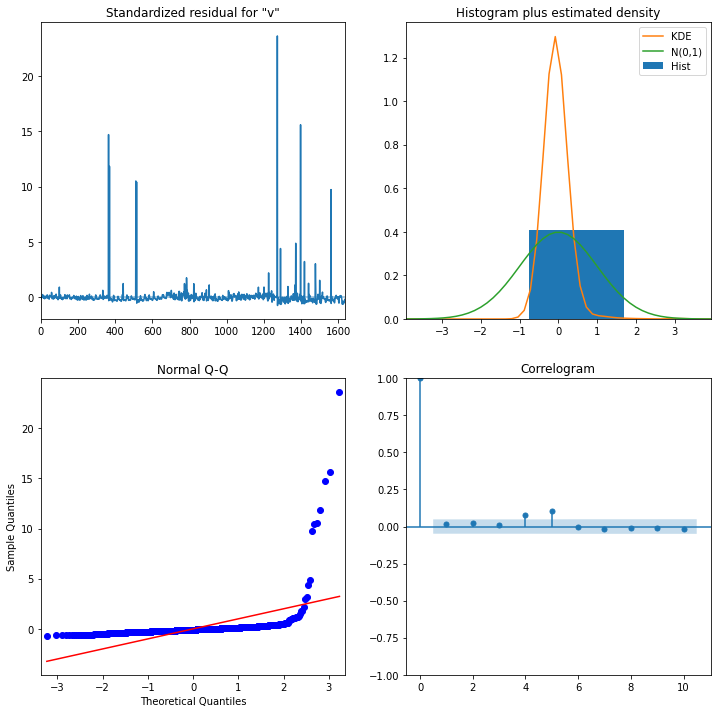

In [9]:
results.plot_diagnostics(figsize=(12, 12)) 
plt.show()


我们主要要确保残差稳定，且平均分布为0。上面的模型诊断表明：

右上角的红色KDE线和黄色N(0,1)线不接近，因此残差不是正太分布，但是其关于x=0对称，因此满足平均分布为0的特性。

随着时间的推移（左上图）残差不会显示任何明显的季节性，似乎是白噪声。这通过右下角的自相关（即相关图）证实了这一点，它表明时间序列的残差与其自身的滞后版本有很低的相关性。


In [10]:
pred = results.get_prediction(start=pd.to_datetime('2011-07-05 02:15:01'), dynamic=True) 
pred_ci = pred.conf_int()



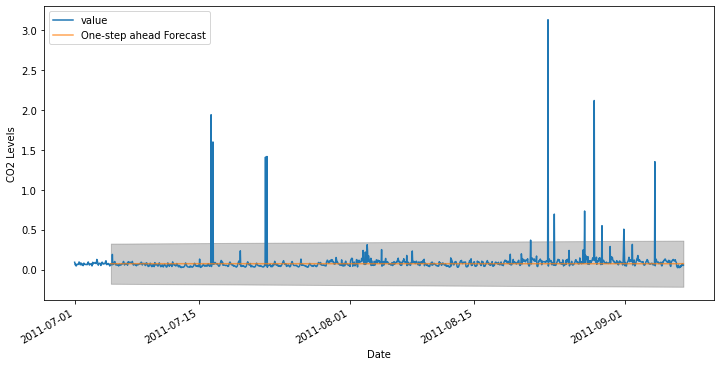

In [11]:
ax = data['2011':].plot(label='Observed',figsize=(12, 6)) 
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)   
ax.fill_between(pred_ci.index,                 
                pred_ci.iloc[:, 0],                 
                pred_ci.iloc[:, 1], color='k', alpha=.2)   
ax.set_xlabel('Date') 
ax.set_ylabel('CO2 Levels') 
plt.legend()   
plt.show()


In [12]:
# Extract the predicted and true values of our time series 
data_forecasted = pred.predicted_mean 
data_truth = data['2011-07-05 02:15:01':]   
# Compute the mean square error 
# mse = ((data_forecasted - data_truth) ** 2).mean() 
# print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print(pred.predicted_mean)

timestamp
2011-07-05 02:15:01    0.073975
2011-07-05 03:15:01    0.073975
2011-07-05 04:15:01    0.073975
2011-07-05 05:15:01    0.073975
2011-07-05 06:15:01    0.073975
                         ...   
2011-09-07 10:15:01    0.073975
2011-09-07 11:15:01    0.073975
2011-09-07 12:15:01    0.073975
2011-09-07 13:15:01    0.073975
2011-09-07 14:15:01    0.073975
Name: predicted_mean, Length: 1545, dtype: float64


In [13]:
print(data_truth)

                        value
timestamp                    
2011-07-05 02:15:01  0.059788
2011-07-05 03:15:01  0.061842
2011-07-05 04:15:01  0.061810
2011-07-05 05:15:01  0.059676
2011-07-05 06:15:01  0.190325
...                       ...
2011-09-07 10:15:01  0.054275
2011-09-07 11:15:01  0.070650
2011-09-07 12:15:01  0.056339
2011-09-07 13:15:01  0.050782
2011-09-07 14:15:01  0.056232

[1545 rows x 1 columns]


In [14]:
res = data_truth
res['value_predicted'] = data_forecasted
res['dist'] = abs(res['value_predicted']-res['value'])
res.to_csv('./02Arima.csv')